<a href="https://colab.research.google.com/github/AntonPoplavsky/MachineLearning/blob/main/watter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Я буду использовать набор данных о качестве воды в городской среде. Нам нужно определить безопасна ли она для употребления человеком в зависимости от состава.

Признаки:
* `aluminium` - dangerous if greater than 2.8
* `ammonia` - dangerous if greater than 32.5
* `arsenic` - dangerous if greater than 0.01
* `barium` - dangerous if greater than 2
* `cadmium` - dangerous if greater than 0.005
* `chloramine` - dangerous if greater than 4
* `chromium` - dangerous if greater than 0.1
* `copper` - dangerous if greater than 1.3
* `flouride` - dangerous if greater than 1.5
* `bacteria` - dangerous if greater than 0
* `viruses` - dangerous if greater than 0
* `lead` - dangerous if greater than 0.015
* `nitrates` - dangerous if greater than 10
* `nitrites` - dangerous if greater than 1
* `mercury` - dangerous if greater than 0.002
* `perchlorate` - dangerous if greater than 56
* `radium` - dangerous if greater than 5
* `selenium` - dangerous if greater than 0.5
* `silver` - dangerous if greater than 0.1
* `uranium` - dangerous if greater than 0.3

Класс объекта: `is_safe` - class attribute {0 - not safe, 1 - safe}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Чтение данных

In [ ]:
data = pd.read_csv('/content/sample_data/waterQuality1.csv', sep = ',', engine = 'python')
data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


Посмотрим информацию о наборе данных более подробно.

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

Глядя на эти данные, мы можем понять, что почти все признаки, за исключением одного, являются количественными, а класс объекта - категориальным признаком.

# Визуализация и основные характеристики

Посчитаем средние значения по каждому столбцу, среднеквадратичное отклонение, минимальные и максимальные значения, а также матрицу корреляций.

In [ ]:
data.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [ ]:
corr_mat = data.corr()
corr_mat

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
aluminium,1.000000,0.225773,0.294145,-0.099911,0.369309,0.353218,0.168612,-0.009784,-0.078238,-0.070863,0.020792,-0.003810,0.237307,-0.003306,0.363069,0.243217,-0.003672,0.334993,0.014711
arsenic,0.225773,1.000000,0.362945,0.334682,0.356559,0.312475,-0.036444,0.003792,0.035688,0.011703,-0.087756,0.027554,0.305005,-0.015404,0.332279,0.218204,-0.007009,0.307837,0.001455
barium,0.294145,0.362945,1.000000,-0.037803,0.446928,0.415972,0.065426,-0.018548,0.101259,-0.002276,-0.042888,-0.011331,0.312711,0.005987,0.462234,0.286569,0.035242,0.431606,-0.002440
cadmium,-0.099911,0.334682,-0.037803,1.000000,-0.144370,-0.157766,-0.109024,0.004880,-0.092431,0.021183,-0.034959,0.020194,-0.015682,-0.016174,-0.149344,-0.099259,0.010145,-0.155408,-0.005633
chloramine,0.369309,0.356559,0.446928,-0.144370,1.000000,0.555938,0.119059,0.004400,0.154510,0.003687,-0.030479,-0.001551,0.379685,-0.021472,0.588769,0.388806,0.011399,0.522447,-0.007658
chromium,0.353218,0.312475,0.415972,-0.157766,0.555938,1.000000,0.113043,-0.002284,0.142041,0.002430,-0.050501,-0.012793,0.335708,-0.022787,0.524532,0.315271,0.030539,0.510768,-0.005526
copper,0.168612,-0.036444,0.065426,-0.109024,0.119059,0.113043,1.000000,0.011683,0.149110,0.006292,0.121765,0.002332,0.162093,0.017626,0.104564,0.026215,-0.003267,0.089333,0.006978
flouride,-0.009784,0.003792,-0.018548,0.004880,0.004400,-0.002284,0.011683,1.000000,0.014134,0.018418,0.011905,-0.008140,-0.016669,-0.004400,-0.016191,0.007688,0.022629,0.014554,0.016792
bacteria,-0.078238,0.035688,0.101259,-0.092431,0.154510,0.142041,0.149110,0.014134,1.000000,0.618480,-0.027525,-0.033920,0.246252,-0.004471,0.147652,0.099298,-0.006971,0.148225,0.044839
viruses,-0.070863,0.011703,-0.002276,0.021183,0.003687,0.002430,0.006292,0.018418,0.618480,1.000000,0.017598,-0.044544,-0.091517,0.011416,0.003208,-0.020112,-0.035047,0.011861,0.058434


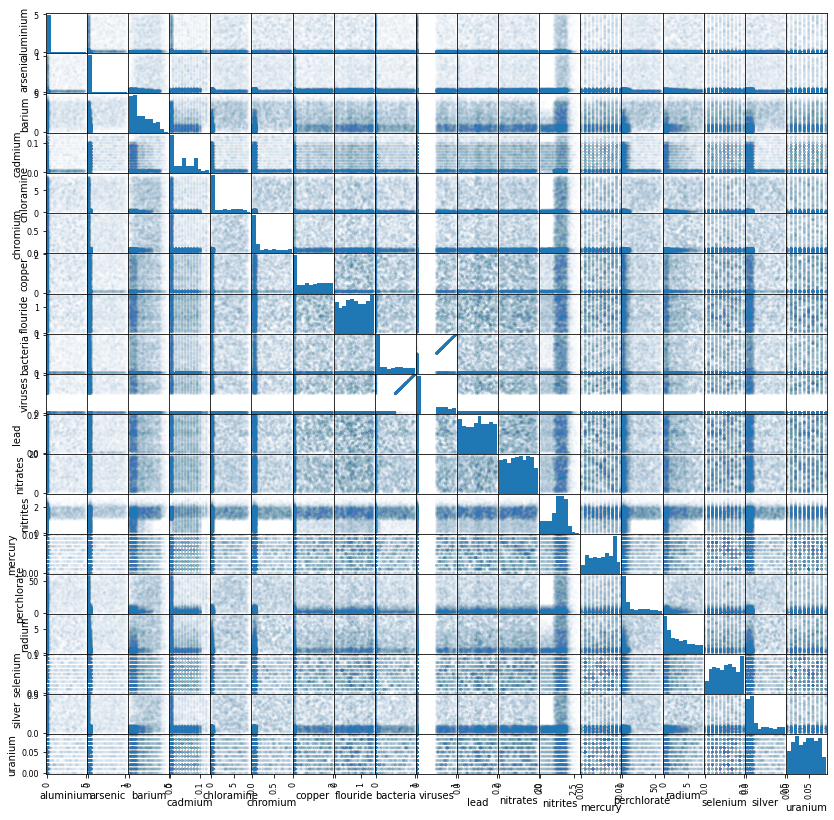

In [ ]:
scatter_matrix(data, alpha = .01, figsize = (14, 14))
pass

In [ ]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

bacteria     viruses        0.618480
chloramine   perchlorate    0.588769
             chromium       0.555938
chromium     perchlorate    0.524532
chloramine   silver         0.522447
chromium     silver         0.510768
perchlorate  silver         0.504604
dtype: float64

В нашем случае явно заметна корреляция между содержанием бактерий и вирусов в воде.

# Обработка категориальных признаков

In [ ]:
data['is_safe'] = data['is_safe'].astype('category')
data.describe(include=['category'])

,is_safe
count,7999
unique,3
top,0
freq,7084


# Обработка пропущенных значений

In [ ]:
data['is_safe']=data['is_safe'].map({'0':0,'1':1,'#NUM!':0})

amm=[]
for i in range(len(data)):
    s=data.loc[i,'ammonia']
    if s=='#NUM!':
        amm+=[0]
    else:
        amm+=[float(s)]
data['ammonia']=amm

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'int64']
print(numerical_columns)

['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']


# Проведем нормализацию

In [ ]:
data_binary = data['is_safe']
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data = pd.concat((data_numerical, data_binary), axis = 1)
data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.777651,-0.584678,-0.480799,1.054432,-0.993251,-0.711652,2.153315,-0.972944,-1.657351,-0.363187,...,-0.781300,1.129905,-0.348839,0.608788,1.203660,1.661403,1.053706,1.339029,-0.917081,1
1,1.307235,0.775442,-0.599568,1.432693,-1.131949,1.208857,1.599074,-0.223180,0.295000,1.002578,...,0.009460,-1.409196,1.046787,-0.739318,0.893271,0.124602,1.053706,0.851397,0.197998,1
2,0.271780,-0.028470,-0.480799,-0.812204,-0.965511,0.803719,1.044833,-1.202464,0.501719,-0.818443,...,-0.368729,0.783418,-0.383730,0.271762,1.912071,1.786241,0.706121,2.035645,-1.288774,0
3,0.548429,-0.331344,-0.480799,1.144886,-1.159689,1.968491,-0.802637,1.306950,0.708439,1.184681,...,-1.434537,-1.517473,-0.069714,-0.402292,-0.415000,-0.516807,-1.031806,2.105306,0.197998,1
4,0.200642,1.132361,-0.520389,-1.124681,-1.020990,0.192117,1.636024,-0.360892,-0.371096,-0.575640,...,0.301698,-0.555611,-0.383730,-0.739318,0.024859,-0.219779,-1.031806,-0.611496,-0.917081,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,-0.487026,-0.731048,-0.639158,0.314356,-0.077840,-0.809041,-0.802637,-1.187162,1.374535,-0.970194,...,1.676933,0.806878,-0.575628,-0.065265,-0.728781,-0.340312,1.401292,-0.611496,-0.545388,1
7995,-0.487026,1.119976,-0.559978,-0.803981,-0.910032,-0.672697,-0.839586,-1.202464,1.627192,-0.970194,...,-1.176680,0.081420,-0.575628,-1.413371,-0.846944,-0.779398,1.401292,-0.332850,1.313077,1
7996,-0.455409,-0.835760,-0.639158,-0.787535,-0.355237,-0.828519,-0.728738,-1.202464,0.317969,-0.970194,...,1.419076,1.101031,-0.575628,-1.750398,-0.854294,0.826279,-1.726977,-0.750820,0.197998,1
7997,-0.518643,-0.481093,-0.599568,0.355471,-1.187429,-0.068885,-0.913485,-1.095355,-1.772195,-0.970194,...,-1.709584,-1.771925,-2.320161,-1.750398,-0.930619,-1.257226,-1.726977,-1.029466,-1.660467,1


In [ ]:
data.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7.999000e+03,7.999000e+03,7.999000e+03,7999.000000,7.999000e+03,7.999000e+03,7.999000e+03,7999.000000,7.999000e+03,7.999000e+03,...,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7999.000000
mean,-1.421263e-16,8.527579e-17,5.685053e-17,0.000000,-1.421263e-16,-1.705516e-16,-1.137011e-16,0.000000,1.012650e-16,4.263789e-17,...,-1.421263e-17,-2.300670e-16,-3.411032e-16,-7.461631e-17,5.685053e-17,1.137011e-16,-2.411706e-16,5.685053e-17,-1.918705e-16,0.114014
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.317848
min,-5.265469e-01,-1.616027e+00,-6.391579e-01,-1.289142,-1.187429e+00,-8.479967e-01,-9.134848e-01,-1.233066,-1.772195e+00,-9.701944e-01,...,-1.709584e+00,-1.771925e+00,-2.320161e+00,-1.750398e+00,-9.306189e-01,-1.257226e+00,-1.726977e+00,-1.029466e+00,-1.660467e+00,0.000000
25%,-4.949300e-01,-8.684115e-01,-5.203886e-01,-0.828651,-9.655111e-01,-8.090412e-01,-7.287378e-01,-1.095355,-8.419574e-01,-9.701944e-01,...,-8.844426e-01,-8.696145e-01,-5.756282e-01,-7.393181e-01,-8.079333e-01,-9.042358e-01,-1.031806e+00,-7.508196e-01,-9.170813e-01,0.000000
50%,-4.712173e-01,-1.608461e-02,-4.412090e-01,-0.310597,-7.784042e-02,-6.415322e-01,-5.809402e-01,-0.085468,-3.595071e-03,-3.024867e-01,...,4.384110e-02,2.006335e-02,1.570755e-01,-6.526493e-02,-4.930211e-01,-2.197786e-01,1.095031e-02,-4.721732e-01,1.979978e-01,0.000000
75%,-3.052284e-01,8.846571e-01,-2.432601e-01,0.750178,7.543508e-01,8.037192e-01,7.122887e-01,0.893815,8.921893e-01,8.811771e-01,...,8.861726e-01,8.646257e-01,7.502167e-01,9.458148e-01,7.360972e-01,7.530977e-01,7.061211e-01,6.424126e-01,9.413838e-01,0.000000
max,3.465090e+00,1.752747e+00,3.517769e+00,2.773053,2.418733e+00,2.533346e+00,2.411961e+00,1.827195,1.673130e+00,2.064841e+00,...,1.728504e+00,1.806638e+00,2.791320e+00,1.619868e+00,2.462177e+00,2.182279e+00,1.748877e+00,2.453614e+00,1.684770e+00,1.000000


# Обучающая и тестовая выборки

In [ ]:
dataX = data.drop('is_safe', axis=1)
dataY = data['is_safe']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(6399, 1600)

# Классификатор ближайших соседей

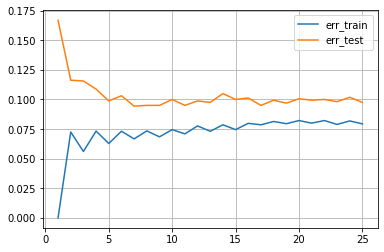

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

max_k = 25
x0 = np.arange(1, max_k + 1, 1)
y1 = []
y2 = []
for i in range(max_k):
    knn = KNeighborsClassifier(n_neighbors = i + 1)
    knn.fit(X_train, y_train)
    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)

    err_train = np.mean(y_train != y_train_predict)
    err_test  = np.mean(y_test  != y_test_predict)
    y1 += [err_train]
    y2 += [err_test]
plt.plot(x0, y1, label="err_train")
plt.plot(x0, y2, label="err_test")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"Ошибка на обучающей выборке: {err_train}")
print(f"Ошибка на тестовой выборке: {err_test}")

Ошибка на обучающей выборке: 0.07938740428191905
Ошибка на тестовой выборке: 0.0975


# Выводы

 В данной работе нами была использованы библиотека машинного обучения, анализа данных, на основе которой мы проанализировали уровень качества воды и решили задачу классификации с помощью модели, натренированной методом k-ближайших соседей. Также были вычислены ошибки обучающей и тестовой выборок.